In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


# **Loading the Required Libraries**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import math

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/MiTH/train_data-1611220940820.csv",header=0)

## **Understanding the data - Exploratory Data Analysis**

**Dimensions of the dataset**

In [ ]:
data.shape

(76529, 11)

**Displaying columns of the dataset**

In [ ]:
data.columns

Index(['transaction_number', 'user_id', 'payment_method', 'partner_id',
       'partner_category', 'country', 'device_type', 'money_transacted',
       'transaction_initiation', 'partner_pricing_category', 'is_fraud'],
      dtype='object')

**Displaying the top 6 rows of the dataset**

In [ ]:
data[:6]

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0
5,2140454669921875,7344100,visa_master_debit_cards,23667,cat_2,IND_INR,other_pcs,20.0,2017-01-22 04:12:16+00:00,4,0


**Summary Stats for all the datatypes**

In [ ]:
data.describe(include='all')

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
count,7.652900e+04,7.652900e+04,76529,76529.000000,76529,76529,76529,76529.000000,76529,76529.000000,76529.000000
unique,NaN,NaN,6,NaN,9,1,4,NaN,75811,NaN,NaN
top,NaN,NaN,sbi_atm_cum_debit_card,NaN,cat_1,IND_INR,other_pcs,NaN,2016-12-24 16:30:13+00:00,NaN,NaN
freq,NaN,NaN,30538,NaN,36306,76529,45560,NaN,12,NaN,NaN
mean,6.940200e+14,1.247483e+07,NaN,58497.189105,NaN,NaN,NaN,132.724348,NaN,2.255707,0.002012
std,7.867885e+14,1.205878e+07,NaN,36740.216787,NaN,NaN,NaN,2350.110900,NaN,0.732174,0.044814
min,8.000000e+00,1.000000e+00,NaN,7889.000000,NaN,NaN,NaN,-20000.000000,NaN,0.000000,0.000000
25%,4.387866e+13,3.515625e+06,NaN,23667.000000,NaN,NaN,NaN,-1.000000,NaN,2.000000,0.000000
50%,3.452540e+14,9.753129e+06,NaN,47334.000000,NaN,NaN,NaN,20.000000,NaN,2.000000,0.000000
75%,1.173440e+15,1.788444e+07,NaN,78890.000000,NaN,NaN,NaN,52.000000,NaN,2.000000,0.000000


**Displaying datatype of each column**

In [ ]:
data.dtypes

transaction_number            int64
user_id                       int64
payment_method               object
partner_id                    int64
partner_category             object
country                      object
device_type                  object
money_transacted            float64
transaction_initiation       object
partner_pricing_category      int64
is_fraud                      int64
dtype: object

**Converting target column to categorical**

In [ ]:
data['is_fraud']=data['is_fraud'].astype('category')
target=data['is_fraud']
data.dtypes

transaction_number             int64
user_id                        int64
payment_method                object
partner_id                     int64
partner_category              object
country                       object
device_type                   object
money_transacted             float64
transaction_initiation        object
partner_pricing_category       int64
is_fraud                    category
dtype: object

**Percentage of each level in target column**

In [ ]:
data['is_fraud'].value_counts(normalize=True)*100 # Imbalance in data

0    99.798769
1     0.201231
Name: is_fraud, dtype: float64

**Graphical representation of percentage of each level in target column**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


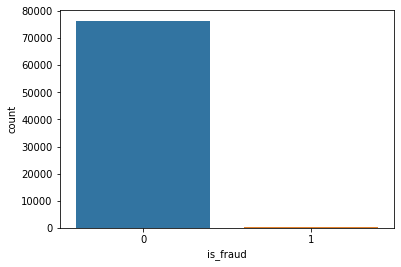

In [ ]:
sns.countplot(data['is_fraud'])
plt.show()

**Correlation between the independent variables**

In [ ]:
cor_mat=data.loc[:,data.columns!='is_fraud'].corr()
cor_mat

,transaction_number,user_id,partner_id,money_transacted,partner_pricing_category
transaction_number,1.000000,-0.006608,0.001564,0.001049,-0.006492
user_id,-0.006608,1.000000,-0.037846,-0.045650,0.424626
partner_id,0.001564,-0.037846,1.000000,0.092432,-0.185584
money_transacted,0.001049,-0.045650,0.092432,1.000000,-0.066396
partner_pricing_category,-0.006492,0.424626,-0.185584,-0.066396,1.000000


**Checking the number of unique values for attributes**

In [ ]:
print("The number of Unique transaction_number in the data set is",data['transaction_number'].nunique())
print("\n")
print(data['transaction_number'].value_counts())

The number of Unique transaction_number in the data set is 76529


166747352433921     1
2533532729328125    1
827803767892375     1
1343891598641864    1
2180361878378711    1
                   ..
172901784411000     1
1670924977938944    1
22689222191         1
2156538857728373    1
1287913472          1
Name: transaction_number, Length: 76529, dtype: int64


In [ ]:
print("The number of Unique user_id in the data set is",data['user_id'].nunique())
print("\n")
print(data['user_id'].value_counts())

The number of Unique user_id in the data set is 3594


53919649    3240
13205956    1656
418609      1530
1201216      623
16265089     622
            ... 
4443664        1
20187049       1
15960025       1
2085136        1
13300609       1
Name: user_id, Length: 3594, dtype: int64


In [ ]:
for i in data.columns:
  print(f'{i} variable has {data[i].nunique()} values \n')

transaction_number variable has 76529 values 

user_id variable has 3594 values 

payment_method variable has 6 values 

partner_id variable has 23 values 

partner_category variable has 9 values 

country variable has 1 values 

device_type variable has 4 values 

money_transacted variable has 1454 values 

transaction_initiation variable has 75811 values 

partner_pricing_category variable has 4 values 

is_fraud variable has 2 values 



Variable 'transaction_number' has only unique values and variable 'country' has same values, so the two variables can be dropped from the dataset.


**Dropping the variables 'transaction_number' and 'country'**

In [ ]:
data.drop(['transaction_number', 'country'], axis = 1, inplace = True)

In [ ]:
data[:6]

,user_id,payment_method,partner_id,partner_category,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,17539344,sbi_atm_cum_debit_card,47334,cat_1,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,24710841,e_wallet_payments,78890,cat_2,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,24265476,e_wallet_payments,78890,cat_2,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,10240000,other_debit_cards,102557,cat_3,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,5880625,other_debit_cards,118335,cat_1,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0
5,7344100,visa_master_debit_cards,23667,cat_2,other_pcs,20.0,2017-01-22 04:12:16+00:00,4,0


In [ ]:
print("The number of Unique payment method in the data set is",data['payment_method'].nunique())
print("\n")
print(data['payment_method'].value_counts())

The number of Unique payment method in the data set is 6


sbi_atm_cum_debit_card        30538
e_wallet_payments             27384
visa_master_debit_cards       11643
other_debit_cards              4495
visa_master_credit_cards       2454
unified_payments_interface       15
Name: payment_method, dtype: int64


In [ ]:
print("The number of Unique user id in the data set is",data['user_id'].nunique())
print("\n")
print(data['user_id'].value_counts())

The number of Unique user id in the data set is 3594


53919649    3240
13205956    1656
418609      1530
1201216      623
16265089     622
            ... 
4443664        1
20187049       1
15960025       1
2085136        1
13300609       1
Name: user_id, Length: 3594, dtype: int64


In [ ]:
print("The number of Unique partner category in the data set is",data['partner_category'].nunique())
print("\n")
print(data['partner_category'].value_counts())

The number of Unique partner category in the data set is 9


cat_1    36306
cat_2    36019
cat_3     1536
cat_4     1310
cat_5     1026
cat_7      165
cat_6      146
cat_8       19
cat_9        2
Name: partner_category, dtype: int64


In [ ]:
print("The number of Unique device type in the data set is",data['device_type'].nunique())
print("\n")
print(data['device_type'].value_counts())

The number of Unique device type in the data set is 4


other_pcs          45560
android_devices    29662
ios_devices          876
windows_pcs          431
Name: device_type, dtype: int64


In [ ]:
print("The number of Unique partner pricing category in the data set is",data['partner_pricing_category'].nunique())
print("\n")
print(data['partner_pricing_category'].value_counts())

The number of Unique partner pricing category in the data set is 4


2    63899
4    10833
1     1497
0      300
Name: partner_pricing_category, dtype: int64


### **Checking the datatypes and Typecasting the obvious ones**

In [ ]:
data.dtypes

user_id                        int64
payment_method                object
partner_id                     int64
partner_category              object
device_type                   object
money_transacted             float64
transaction_initiation        object
partner_pricing_category       int64
is_fraud                    category
dtype: object

In [ ]:
cols = ['user_id',
   'payment_method',
   'partner_id',
   'partner_category',
   'device_type',
   'partner_pricing_category']
data[cols] = data[cols].astype('category')
data['transaction_initiation'] = pd.to_datetime(data['transaction_initiation'])

In [ ]:
data['transaction_year'] = data['transaction_initiation'].dt.year
data['transaction_date'] = data['transaction_initiation'].dt.day
data['transaction_month']= data['transaction_initiation'].dt.month
data['transaction_hour'] = data['transaction_initiation'].dt.hour
data['transaction_weekday']= data['transaction_initiation'].dt.weekday

In [ ]:
data.dtypes

user_id                                category
payment_method                         category
partner_id                             category
partner_category                       category
device_type                            category
money_transacted                        float64
transaction_initiation      datetime64[ns, UTC]
partner_pricing_category               category
is_fraud                               category
transaction_year                          int64
transaction_date                          int64
transaction_month                         int64
transaction_hour                          int64
transaction_weekday                       int64
dtype: object

**Handling Missing Values**

In [ ]:
data.isna().sum()

user_id                     0
payment_method              0
partner_id                  0
partner_category            0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
is_fraud                    0
transaction_year            0
transaction_date            0
transaction_month           0
transaction_hour            0
transaction_weekday         0
dtype: int64

**No missing values in the data**


In [ ]:
data.head()

,user_id,payment_method,partner_id,partner_category,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud,transaction_year,transaction_date,transaction_month,transaction_hour,transaction_weekday
0,17539344,sbi_atm_cum_debit_card,47334,cat_1,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0,2016,15,11,19,1
1,24710841,e_wallet_payments,78890,cat_2,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0,2017,11,1,9,2
2,24265476,e_wallet_payments,78890,cat_2,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0,2016,7,12,7,2
3,10240000,other_debit_cards,102557,cat_3,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0,2017,11,1,16,2
4,5880625,other_debit_cards,118335,cat_1,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0,2016,16,11,17,2


In [ ]:
data.drop(['transaction_initiation','user_id'], axis = 1, inplace = True)

In [ ]:
data.describe(include = 'all')

,payment_method,partner_id,partner_category,device_type,money_transacted,partner_pricing_category,is_fraud,transaction_year,transaction_date,transaction_month,transaction_hour,transaction_weekday
count,76529,76529.0,76529,76529,76529.000000,76529.0,76529.0,76529.000000,76529.000000,76529.000000,76529.000000,76529.000000
unique,6,23.0,9,4,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN
top,sbi_atm_cum_debit_card,47334.0,cat_1,other_pcs,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN
freq,30538,26105.0,36306,45560,NaN,63899.0,76375.0,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,132.724348,NaN,NaN,2016.496100,15.909551,6.576958,12.452260,2.976911
std,NaN,NaN,NaN,NaN,2350.110900,NaN,NaN,0.499988,8.956141,5.223658,4.850698,1.929435
min,NaN,NaN,NaN,NaN,-20000.000000,NaN,NaN,2016.000000,1.000000,1.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,2016.000000,8.000000,1.000000,8.000000,2.000000
50%,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,2016.000000,16.000000,11.000000,13.000000,2.000000
75%,NaN,NaN,NaN,NaN,52.000000,NaN,NaN,2017.000000,24.000000,12.000000,17.000000,5.000000


## **Univariate Analysis**

In [ ]:
def barplot(column,df):
    plt.figure(figsize = (15,7))
    bar_plot1 = sns.countplot(x=column, data=df)
    plt.xticks(rotation = 45)
    total = len(df[column])
    for p in bar_plot1.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        height = p.get_height()
        bar_plot1.text(p.get_x()+ p.get_width()/2, height + 400, percentage, ha="center")

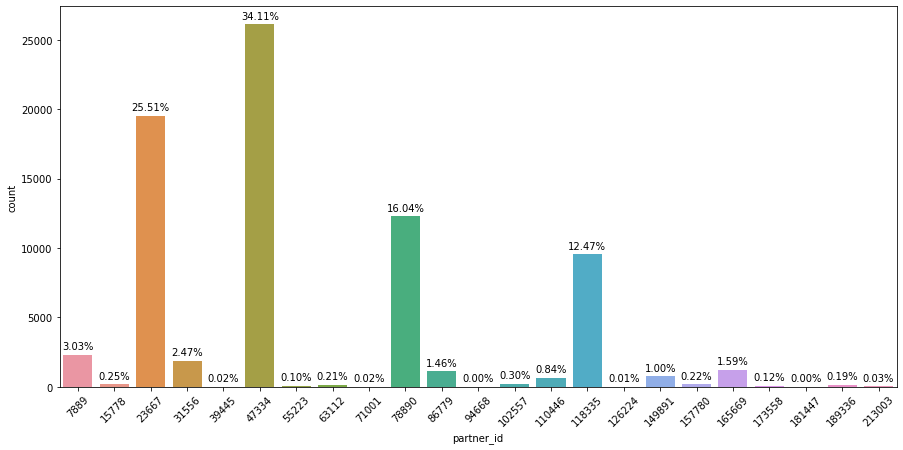

In [ ]:
barplot('partner_id',data) #Around 88 percent of the transactions are done by only 4 partners

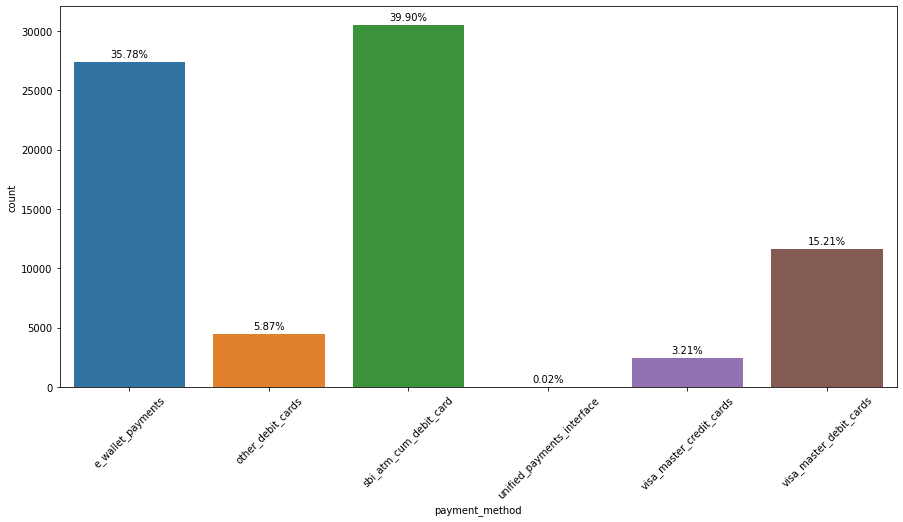

In [ ]:
barplot('payment_method',data) # Very few UPI transactions and most of the transactions are made through 'sbi_atm_cum_debit_card'

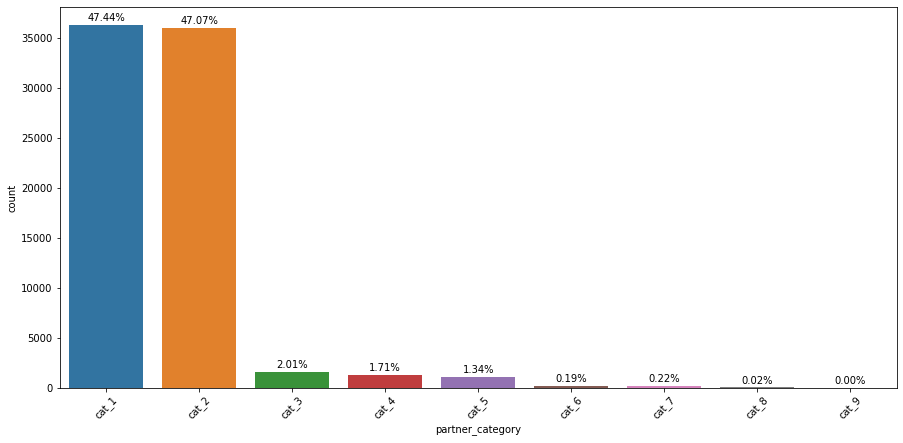

In [ ]:
barplot('partner_category',data) #Around 95% of the traansactions belong to category 1,2

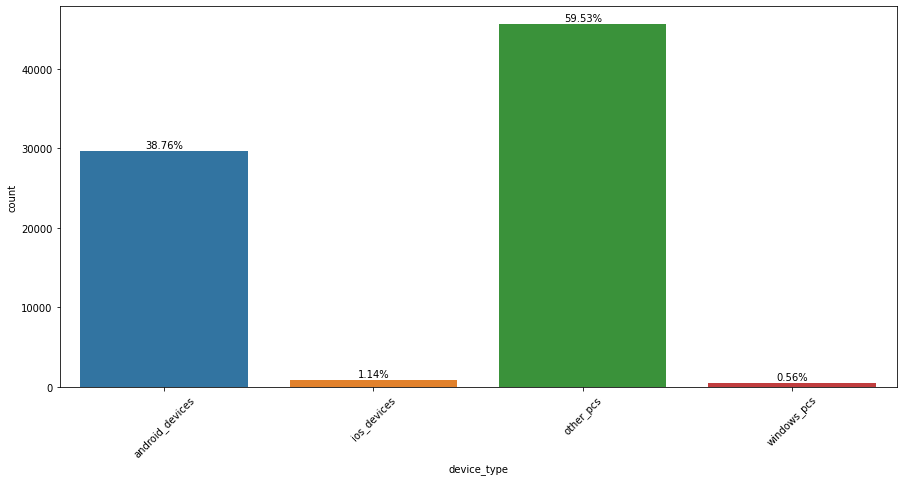

In [ ]:
barplot('device_type',data) # Very few transactions are done through IOS devices and Windows_ps

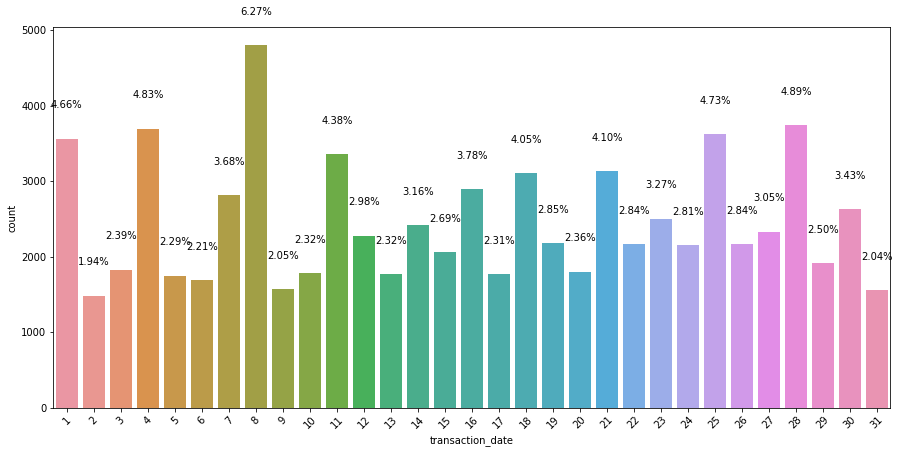

In [ ]:
barplot('transaction_date',data) # There is no particular day which has high number of transactions

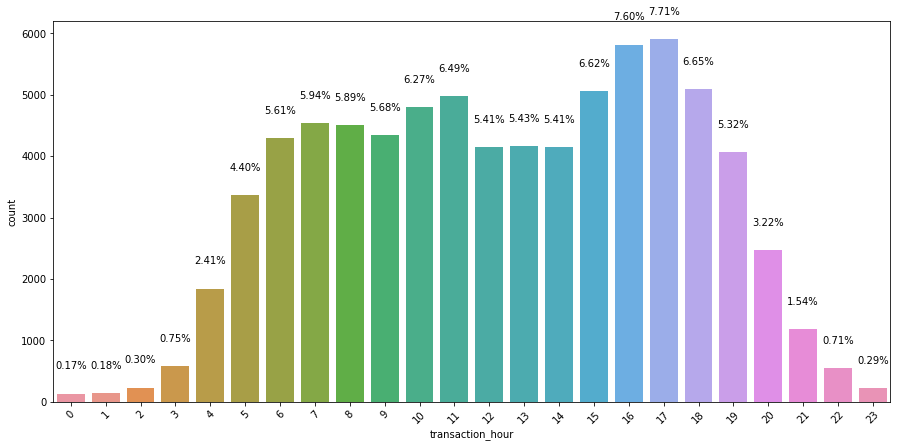

In [ ]:
barplot('transaction_hour',data) # Most of the transactions are done between 5 am and 10 pm

# **Feature Engineering**

In [ ]:
# Generating new feature
data['credit'] = np.nan
for i in range(len(data)):
    if data.loc[i, 'money_transacted'] < 0:
        data.loc[i, 'credit'] = 1
    elif data.loc[i, 'money_transacted'] > 0:
        data.loc[i, 'credit'] = 0
        
data['credit'] = data['credit'].astype('int64')
data['money_transacted'] = abs(data['money_transacted'])
data.head()

# Making the money as positive value by using credit row

,payment_method,partner_id,partner_category,device_type,money_transacted,partner_pricing_category,is_fraud,transaction_year,transaction_date,transaction_month,transaction_hour,transaction_weekday,credit
0,sbi_atm_cum_debit_card,47334,cat_1,android_devices,5.0,2,0,2016,15,11,19,1,1
1,e_wallet_payments,78890,cat_2,other_pcs,100.0,2,0,2017,11,1,9,2,0
2,e_wallet_payments,78890,cat_2,other_pcs,50.0,2,0,2016,7,12,7,2,0
3,other_debit_cards,102557,cat_3,other_pcs,1000.0,2,0,2017,11,1,16,2,0
4,other_debit_cards,118335,cat_1,other_pcs,200.0,2,0,2016,16,11,17,2,0


In [ ]:
data.dtypes

payment_method              category
partner_id                  category
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category    category
is_fraud                    category
transaction_year               int64
transaction_date               int64
transaction_month              int64
transaction_hour               int64
transaction_weekday            int64
credit                         int64
dtype: object

Typecasting the newly created features

In [ ]:
data[['transaction_year', 'transaction_month','transaction_weekday', 'credit']] = data[['transaction_year', 'transaction_month','transaction_weekday', 'credit']].astype('category')
data.dtypes

payment_method              category
partner_id                  category
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category    category
is_fraud                    category
transaction_year            category
transaction_date               int64
transaction_month           category
transaction_hour               int64
transaction_weekday         category
credit                      category
dtype: object

## **Performing Chisquare test of independence on categorical variables**

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
cat_cols = data.select_dtypes('category').columns
cat_cols

Index(['payment_method', 'partner_id', 'partner_category', 'device_type',
       'partner_pricing_category', 'is_fraud', 'transaction_year',
       'transaction_month', 'transaction_weekday', 'credit'],
      dtype='object')

In [ ]:
def find_chi2_independence(cat_col, target, data, alpha=0.05):
    data = data[[target, cat_col]]
    tab = sm.stats.Table.from_data(data)
    tab = tab.table_orig.to_numpy()
    print(f"---------------{target} Vs {cat_col} Chi Square Test of Independence -------------------")
    print(f"\n Contingency table :\n")
    print(tab)
    
    stat, p, dof, expected = chi2_contingency(tab)
    print(f"\n Expected table :\n")
    print(expected)
    
    print(f"The p value returned = {p} and degrees of freedom returned = {dof}")
    
    # interpret p-value
    print('significance(alpha) = %.3f' % (alpha))

    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)') 

In [ ]:
for col in cat_cols:
    find_chi2_independence(col, 'is_fraud', data)

---------------is_fraud Vs payment_method Chi Square Test of Independence -------------------

 Contingency table :

[[27382  4452 30533    15  2401 11592]
 [    2    43     5     0    53    51]]

 Expected table :

[[2.73288949e+04 4.48595467e+03 3.04765481e+04 1.49698154e+01
  2.44906179e+03 1.16195707e+04]
 [5.51050713e+01 9.04532922e+00 6.14518941e+01 3.01846359e-02
  4.93820643e+00 2.34293144e+01]]
The p value returned = 5.316478181917259e-156 and degrees of freedom returned = 5
significance(alpha) = 0.050
Dependent (reject H0)
---------------is_fraud Vs partner_id Chi Square Test of Independence -------------------

 Contingency table :

[[ 2317   189 19517  1892    17 26104    75   159    12 12267  1121     2
    227   640  9422    10   767   165  1212    88     1   146    25]
 [    0     0     9     0     2     1     0     0     3     6     0     0
      4     0   124     0     0     0     4     1     0     0     0]]

 Expected table :

[[2.31233748e+03 1.88619674e+02 1.9486707

## **Test data**

In [ ]:
test = pd.read_csv('/content/gdrive/MyDrive/MiTH/test_data-1611220982388.csv')

In [ ]:
test.shape

(19133, 10)

In [ ]:
test[:6]

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
0,857050141038272,3802500,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-12-28 14:44:37+00:00,2
1,4400462872603,200704,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2016-12-14 17:49:48+00:00,2
2,1207915598569499,25150225,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2017-01-21 10:18:11+00:00,2
3,2009725616777536,21827584,visa_master_credit_cards,78890,cat_2,IND_INR,other_pcs,200.0,2017-01-16 13:25:10+00:00,1
4,2319205210274863,576081,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,100.0,2017-02-09 12:47:28+00:00,2
5,17661313666088,1256641,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,20.0,2017-01-28 02:27:38+00:00,2


In [ ]:
test.drop(['transaction_number', 'country','user_id'], axis = 1, inplace = True)

In [ ]:
cat_cols1 = ['payment_method','partner_id','partner_category', 'device_type', 'partner_pricing_category']
test[cat_cols1] = test[cat_cols1].astype('category')

In [ ]:
test['transaction_initiation'] = pd.to_datetime(test['transaction_initiation'])

test['transaction_year'] = test['transaction_initiation'].dt.year
test['transaction_date'] = test['transaction_initiation'].dt.day
test['transaction_month']=test['transaction_initiation'].dt.month
test['transaction_hour'] = test['transaction_initiation'].dt.hour
test['transaction_weekday']=test['transaction_initiation'].dt.weekday

In [ ]:
test.drop('transaction_initiation', axis = 1, inplace = True)

In [ ]:
test['credit'] = np.nan
for i in range(len(test)):
    if test.loc[i, 'money_transacted'] < 0:
        test.loc[i, 'credit'] = 1
    elif test.loc[i, 'money_transacted'] > 0:
        test.loc[i, 'credit'] = 0
        
test['credit'] = test['credit'].astype('int64')
test['money_transacted'] = abs(test['money_transacted'])

In [ ]:
test[:6]

,payment_method,partner_id,partner_category,device_type,money_transacted,partner_pricing_category,transaction_year,transaction_date,transaction_month,transaction_hour,transaction_weekday,credit
0,visa_master_debit_cards,118335,cat_1,other_pcs,200.0,2,2016,28,12,14,2,0
1,e_wallet_payments,23667,cat_2,other_pcs,20.0,2,2016,14,12,17,2,0
2,sbi_atm_cum_debit_card,47334,cat_1,android_devices,100.0,2,2017,21,1,10,5,1
3,visa_master_credit_cards,78890,cat_2,other_pcs,200.0,1,2017,16,1,13,0,0
4,e_wallet_payments,23667,cat_2,other_pcs,100.0,2,2017,9,2,12,3,0
5,e_wallet_payments,78890,cat_2,other_pcs,20.0,2,2017,28,1,2,5,0


In [ ]:
test.shape

(19133, 12)

In [ ]:
data.shape

(76529, 13)

In [ ]:
data.columns

Index(['payment_method', 'partner_id', 'partner_category', 'device_type',
       'money_transacted', 'partner_pricing_category', 'is_fraud',
       'transaction_year', 'transaction_date', 'transaction_month',
       'transaction_hour', 'transaction_weekday', 'credit'],
      dtype='object')

In [ ]:
test.columns

Index(['payment_method', 'partner_id', 'partner_category', 'device_type',
       'money_transacted', 'partner_pricing_category', 'transaction_year',
       'transaction_date', 'transaction_month', 'transaction_hour',
       'transaction_weekday', 'credit'],
      dtype='object')

In [ ]:
test.isna().sum()

payment_method              0
partner_id                  0
partner_category            0
device_type                 0
money_transacted            0
partner_pricing_category    0
transaction_year            0
transaction_date            0
transaction_month           0
transaction_hour            0
transaction_weekday         0
credit                      0
dtype: int64

### **Splitting dataset as train and validation data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import StratifiedShuffleSplit

from xgboost import XGBClassifier

In [ ]:
y=data["is_fraud"]
X=data.drop('is_fraud', axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20,random_state=340, stratify=y)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(61223, 12)
(15306, 12)
(61223,)
(15306,)


In [ ]:
data.dtypes

payment_method              category
partner_id                  category
partner_category            category
device_type                 category
money_transacted             float64
partner_pricing_category    category
is_fraud                    category
transaction_year            category
transaction_date               int64
transaction_month           category
transaction_hour               int64
transaction_weekday         category
credit                      category
dtype: object

### **Imputation**

In [ ]:
num_attr = list(data.select_dtypes(['float64','int64']).columns)
print(num_attr)
cat_attr = ['payment_method', 'partner_id', 'partner_category', 'device_type', 'partner_pricing_category',
       'transaction_year', 'transaction_month', 'transaction_weekday', 'credit']
print(cat_attr)

['money_transacted', 'transaction_date', 'transaction_hour']
['payment_method', 'partner_id', 'partner_category', 'device_type', 'partner_pricing_category', 'transaction_year', 'transaction_month', 'transaction_weekday', 'credit']


In [ ]:
imputer = SimpleImputer(strategy='median')

imputer = imputer.fit(X_train[num_attr])

X_train[num_attr] = imputer.transform(X_train[num_attr])
X_val[num_attr] = imputer.transform(X_val[num_attr])
test[num_attr] = imputer.transform(test[num_attr])

# Imputing missing values with median for numerical attributes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

imputer = imputer.fit(X_train[cat_attr])

X_train[cat_attr] = imputer.transform(X_train[cat_attr])
X_val[cat_attr] = imputer.transform(X_val[cat_attr])
test[cat_attr] = imputer.transform(test[cat_attr])

#Imputing missing values with mode for categorical attributes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

### **Standardizing the numerical attributes and One-hot encoding categorical attributes**

In [ ]:
mapper = DataFrameMapper(
  [([continuous_col], StandardScaler()) for continuous_col in num_attr] +
  [([categorical_col], OneHotEncoder(handle_unknown='error')) for categorical_col in cat_attr]
, df_out=True)

In [ ]:
print(type(mapper))

<class 'sklearn_pandas.dataframe_mapper.DataFrameMapper'>


In [ ]:
mapper.fit(X_train)

X_train_final = mapper.transform(X_train)
X_val_final = mapper.transform(X_val)
test_final = mapper.transform(test)

In [ ]:
X_train_final.head()

,money_transacted,transaction_date,transaction_hour,payment_method_x0_e_wallet_payments,payment_method_x0_other_debit_cards,payment_method_x0_sbi_atm_cum_debit_card,payment_method_x0_unified_payments_interface,payment_method_x0_visa_master_credit_cards,payment_method_x0_visa_master_debit_cards,partner_id_x0_7889,partner_id_x0_15778,partner_id_x0_23667,partner_id_x0_31556,partner_id_x0_39445,partner_id_x0_47334,partner_id_x0_55223,partner_id_x0_63112,partner_id_x0_71001,partner_id_x0_78890,partner_id_x0_86779,partner_id_x0_94668,partner_id_x0_102557,partner_id_x0_110446,partner_id_x0_118335,partner_id_x0_126224,partner_id_x0_149891,partner_id_x0_157780,partner_id_x0_165669,partner_id_x0_173558,partner_id_x0_181447,partner_id_x0_189336,partner_id_x0_213003,partner_category_x0_cat_1,partner_category_x0_cat_2,partner_category_x0_cat_3,partner_category_x0_cat_4,partner_category_x0_cat_5,partner_category_x0_cat_6,partner_category_x0_cat_7,partner_category_x0_cat_8,partner_category_x0_cat_9,device_type_x0_android_devices,device_type_x0_ios_devices,device_type_x0_other_pcs,device_type_x0_windows_pcs,partner_pricing_category_x0_0,partner_pricing_category_x0_1,partner_pricing_category_x0_2,partner_pricing_category_x0_4,transaction_year_x0_2016,transaction_year_x0_2017,transaction_month_x0_1,transaction_month_x0_2,transaction_month_x0_11,transaction_month_x0_12,transaction_weekday_x0_0,transaction_weekday_x0_1,transaction_weekday_x0_2,transaction_weekday_x0_3,transaction_weekday_x0_4,transaction_weekday_x0_5,transaction_weekday_x0_6,credit_x0_0,credit_x0_1
14525,0.000197,-0.996284,0.111392,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9243,-0.055684,-0.661697,-0.713522,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
69178,-0.039718,1.568885,-0.094836,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
68162,0.005785,0.007478,1.142535,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
27512,-0.075641,-1.330871,0.936307,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### **Error Metrics**

In [ ]:
def classifcation_report_and_CM_train_test(train, train_pred, val, val_pred):

    print('''
            =========================================================
            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR TRAIN DATA
            =========================================================
            ''')
    print(pd.crosstab(train, train_pred, rownames=['Actual'], colnames=['Predicted']))
    print(classification_report(train, train_pred, digits=4))
    

    print('''
            =========================================================
            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR Val DATA
            =========================================================
            ''')
    print(pd.crosstab(val, val_pred, rownames=['Actual'], colnames=['Predicted']))
    print(classification_report(val, val_pred, digits=4))




# Code to printout entire table #
scores = pd.DataFrame(columns=['Model','Train_F1_Score','Val_F1_Score','Train_Recall','Val_Recall','Train_Precision','Val_Precision','Train_Accuracy','Val_Accuracy',])

def get_metrics(train_actual,train_predicted,val_actual,val_predicted,model_description,dataframe):
    classifcation_report_and_CM_train_test(train_actual,train_predicted,val_actual,val_predicted)
    train_accuracy = accuracy_score(train_actual,train_predicted)
    
    train_recall   = recall_score(train_actual,train_predicted)
    
    train_precision= precision_score(train_actual,train_predicted)
    
    train_f1score  = f1_score(train_actual,train_predicted)
    
    val_accuracy = accuracy_score(val_actual,val_predicted)
    
    val_recall   = recall_score(val_actual,val_predicted)
    
    val_precision= precision_score(val_actual,val_predicted)
    
    val_f1score  = f1_score(val_actual,val_predicted)
    
    dataframe = dataframe.append(pd.Series([model_description, train_f1score, val_f1score,train_recall,val_recall,train_precision,val_precision,
                                            train_accuracy,val_accuracy],
                                           index=scores.columns ), ignore_index=True)
    
    return(dataframe)

## **Model Building**

### **Logistic Regression**

In [ ]:
log_mod = LogisticRegression(random_state=123)

In [ ]:
log_mod.fit(X_train_final, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_train = log_mod.predict(X_train_final)
y_pred_val = log_mod.predict(X_val_final)

In [ ]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"LogisticRegression",scores)
scores


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR TRAIN DATA
            
Predicted      0   1
Actual              
0          61074  26
1             79  44
              precision    recall  f1-score   support

           0     0.9987    0.9996    0.9991     61100
           1     0.6286    0.3577    0.4560       123

    accuracy                         0.9983     61223
   macro avg     0.8136    0.6786    0.7275     61223
weighted avg     0.9980    0.9983    0.9980     61223


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR Val DATA
            
Predicted      0  1
Actual             
0          15268  7
1             25  6
              precision    recall  f1-score   support

           0     0.9984    0.9995    0.9990     15275
           1     0.4615    0.1935    0.2727        31

    accuracy                         0.9979     15306
   macro avg     0.7300    0.5965    0.6358     15306
weighted avg     0.9973    0.9979    0.9975     15306



,Model,Train_F1_Score,Val_F1_Score,Train_Recall,Val_Recall,Train_Precision,Val_Precision,Train_Accuracy,Val_Accuracy
0,LogisticRegression,0.455959,0.272727,0.357724,0.193548,0.628571,0.461538,0.998285,0.997909


### **Logistic Regression with class_weight='balanced'**

In [ ]:
log_mod = LogisticRegression(class_weight='balanced', random_state=123)

In [ ]:
log_mod.fit(X_train_final, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_train = log_mod.predict(X_train_final)
y_pred_val = log_mod.predict(X_val_final)

In [ ]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"LogisticRegression_Balanced",scores)
scores


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR TRAIN DATA
            
Predicted      0    1
Actual               
0          60912  188
1              1  122
              precision    recall  f1-score   support

           0     1.0000    0.9969    0.9985     61100
           1     0.3935    0.9919    0.5635       123

    accuracy                         0.9969     61223
   macro avg     0.6968    0.9944    0.7810     61223
weighted avg     0.9988    0.9969    0.9976     61223


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR Val DATA
            
Predicted      0   1
Actual              
0          15217  58
1              0  31
              precision    recall  f1-score   support

           0     1.0000    0.9962    0.9981     15275
           1     0.3483    1.0000    0.5167        31

    accuracy                         0.9962     15306
   macro avg     0.6742    0.9981    0.7574     15306
weighted avg     0.9987    0.9962    0.9971     15306



,Model,Train_F1_Score,Val_F1_Score,Train_Recall,Val_Recall,Train_Precision,Val_Precision,Train_Accuracy,Val_Accuracy
0,LogisticRegression,0.455959,0.272727,0.357724,0.193548,0.628571,0.461538,0.998285,0.997909
1,LogisticRegression_Balanced,0.563510,0.516667,0.991870,1.000000,0.393548,0.348315,0.996913,0.996211


## **Decision Tree**

In [ ]:
# Create Decision Tree classifer object
clf_dt = DecisionTreeClassifier(random_state=123)

# Train Decision Tree Classifer
clf_dt.fit(X_train_final,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [ ]:
y_pred_train = clf_dt.predict(X_train_final)
y_pred_val = clf_dt.predict(X_val_final)

In [ ]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"DecisionTree",scores)
scores


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR TRAIN DATA
            
Predicted      0    1
Actual               
0          61100    0
1              1  122
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     61100
           1     1.0000    0.9919    0.9959       123

    accuracy                         1.0000     61223
   macro avg     1.0000    0.9959    0.9980     61223
weighted avg     1.0000    1.0000    1.0000     61223


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR Val DATA
            
Predicted      0   1
Actual              
0          15272   3
1              6  25
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     15275
           1     0.8929    0.8065    0.8475        31

    accuracy                         0.9994     15306
   macro avg     0.9462    0.9031    0.9236     15306
weighted avg     0.9994    0.9994    0.9994     15306



,Model,Train_F1_Score,Val_F1_Score,Train_Recall,Val_Recall,Train_Precision,Val_Precision,Train_Accuracy,Val_Accuracy
0,LogisticRegression,0.455959,0.272727,0.357724,0.193548,0.628571,0.461538,0.998285,0.997909
1,LogisticRegression_Balanced,0.563510,0.516667,0.991870,1.000000,0.393548,0.348315,0.996913,0.996211
2,DecisionTree,0.995918,0.847458,0.991870,0.806452,1.000000,0.892857,0.999984,0.999412


In [ ]:
test1 = pd.read_csv('/content/gdrive/MyDrive/MiTH/test_data-1611220982388.csv')

In [ ]:
transaction_id = test1['transaction_number']

In [ ]:
y_pred_test = clf_dt.predict(test_final)

In [ ]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
data1 = {'Transaction_number':transaction_id,'Predictions':y_pred_test}
pred_final = pd.DataFrame(data1)

In [ ]:
pred_final.head()

,Transaction_number,Predictions
0,857050141038272,0
1,4400462872603,0
2,1207915598569499,0
3,2009725616777536,0
4,2319205210274863,0


In [ ]:
pred_final = pred_final.set_index('Transaction_number')

In [ ]:
pred_final['Predictions'].value_counts()

0    19098
1       35
Name: Predictions, dtype: int64

In [ ]:
pred_final.to_csv('predictions_DT.csv')

## **Decision Tree Balanced**

In [ ]:
clf_dt_balanced = DecisionTreeClassifier(random_state=340, class_weight = 'balanced')

In [ ]:
clf_dt_balanced.fit(X_train_final,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=340, splitter='best')

In [ ]:
y_pred_train = clf_dt_balanced.predict(X_train_final)
y_pred_val = clf_dt_balanced.predict(X_val_final)

In [ ]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"DecisionTree Balanced",scores)
scores


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR TRAIN DATA
            
Predicted      0    1
Actual               
0          61099    1
1              0  123
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     61100
           1     0.9919    1.0000    0.9960       123

    accuracy                         1.0000     61223
   macro avg     0.9960    1.0000    0.9980     61223
weighted avg     1.0000    1.0000    1.0000     61223


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR Val DATA
            
Predicted      0   1
Actual              
0          15271   4
1              3  28
              precision    recall  f1-score   support

           0     0.9998    0.9997    0.9998     15275
           1     0.8750    0.9032    0.8889        31

    accuracy                         0.9995     15306
   macro avg     0.9374    0.9515    0.9443     15306
weighted avg     0.9996    0.9995    0.9995     15306



,Model,Train_F1_Score,Val_F1_Score,Train_Recall,Val_Recall,Train_Precision,Val_Precision,Train_Accuracy,Val_Accuracy
0,LogisticRegression,0.455959,0.272727,0.357724,0.193548,0.628571,0.461538,0.998285,0.997909
1,LogisticRegression_Balanced,0.563510,0.516667,0.991870,1.000000,0.393548,0.348315,0.996913,0.996211
2,DecisionTree,0.995918,0.847458,0.991870,0.806452,1.000000,0.892857,0.999984,0.999412
3,DecisionTree Balanced,0.995951,0.888889,1.000000,0.903226,0.991935,0.875000,0.999984,0.999543


In [ ]:
y_pred_test = clf_dt_balanced.predict(test_final)

In [ ]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
data1 = {'Transaction_number':transaction_id,'Predictions':y_pred_test}
pred_final = pd.DataFrame(data1)

In [ ]:
pred_final.head()

,Transaction_number,Predictions
0,857050141038272,0
1,4400462872603,0
2,1207915598569499,0
3,2009725616777536,0
4,2319205210274863,0


In [ ]:
pred_final = pred_final.set_index('Transaction_number')

In [ ]:
pred_final['Predictions'].value_counts()

0    19091
1       42
Name: Predictions, dtype: int64

In [ ]:
pred_final.to_csv('predictions_DT_balanced.csv')

## **Random Forests**

In [ ]:
rfc = RandomForestClassifier(random_state=340, class_weight = 'balanced', n_estimators = 71, min_samples_split = 0.05, 
                             max_features = 0.46, max_depth = 10)

rfc.fit(X_train_final,y_train)

y_pred_train = rfc.predict(X_train_final)
y_pred_val = rfc.predict(X_val_final)

In [ ]:
scores = get_metrics(y_train,y_pred_train,y_val,y_pred_val,"Random Forest Classifier",scores)
scores


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR TRAIN DATA
            
Predicted      0    1
Actual               
0          60382  718
1              1  122
              precision    recall  f1-score   support

           0     1.0000    0.9882    0.9941     61100
           1     0.1452    0.9919    0.2534       123

    accuracy                         0.9883     61223
   macro avg     0.5726    0.9901    0.6237     61223
weighted avg     0.9983    0.9883    0.9926     61223


            CLASSIFICATION REPORT AND CONFUSION MATRIX FOR Val DATA
            
Predicted      0    1
Actual               
0          15093  182
1              0   31
              precision    recall  f1-score   support

           0     1.0000    0.9881    0.9940     15275
           1     0.1455    1.0000    0.2541        31

    accuracy                         0.9881     15306
   macro avg     0.5728    0.9940    0.6241     15306
weighted avg     0.9983    0.9881    0.9925     15306



,Model,Train_F1_Score,Val_F1_Score,Train_Recall,Val_Recall,Train_Precision,Val_Precision,Train_Accuracy,Val_Accuracy
0,LogisticRegression,0.455959,0.272727,0.357724,0.193548,0.628571,0.461538,0.998285,0.997909
1,LogisticRegression_Balanced,0.563510,0.516667,0.991870,1.000000,0.393548,0.348315,0.996913,0.996211
2,DecisionTree,0.995918,0.847458,0.991870,0.806452,1.000000,0.892857,0.999984,0.999412
3,DecisionTree Balanced,0.995951,0.888889,1.000000,0.903226,0.991935,0.875000,0.999984,0.999543
4,Random Forest Classifier,0.253375,0.254098,0.991870,1.000000,0.145238,0.145540,0.988256,0.988109


In [ ]:
clf_dt_balanced.feature_importances_

array([9.75441712e-01, 1.83314987e-03, 9.19197580e-03, 9.04422032e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.91480719e-03,
       9.76133663e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.32282345e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.26685288e-05,
       0.00000000e+00, 0.00000000e+00, 8.40570441e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.52850749e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.61934472e-09, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.27013781e-05, 3.26685288e-05, 4.54613434e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.19446806e-03,
      

In [ ]:
features = X_train_final.columns
importances = clf_dt_balanced.feature_importances_

indices = np.argsort(importances)[::-1]

pd.set_option('max_columns',None)
pd.DataFrame([X_train_final.columns[indices],np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,money_transacted,transaction_hour,payment_method_x0_visa_master_credit_cards,transaction_date,partner_id_x0_55223,transaction_weekday_x0_0,payment_method_x0_e_wallet_payments,partner_id_x0_157780,transaction_weekday_x0_2,transaction_month_x0_1,payment_method_x0_visa_master_debit_cards,partner_category_x0_cat_2,transaction_year_x0_2016,partner_id_x0_118335,transaction_year_x0_2017,transaction_weekday_x0_1,partner_pricing_category_x0_0,partner_id_x0_15778,partner_id_x0_86779,partner_id_x0_149891,partner_id_x0_126224,payment_method_x0_unified_payments_interface,partner_id_x0_110446,partner_id_x0_7889,partner_id_x0_102557,partner_id_x0_94668,partner_id_x0_78890,partner_id_x0_165669,partner_id_x0_71001,partner_id_x0_63112,payment_method_x0_other_debit_cards,payment_method_x0_sbi_atm_cum_debit_card,partner_id_x0_39445,partner_id_x0_31556,partner_id_x0_23667,partner_id_x0_47334,credit_x0_1,partner_id_x0_173558,device_type_x0_other_pcs,transaction_weekday_x0_6,transaction_weekday_x0_5,transaction_weekday_x0_4,transaction_weekday_x0_3,transaction_month_x0_12,transaction_month_x0_11,transaction_month_x0_2,partner_pricing_category_x0_4,partner_pricing_category_x0_2,partner_pricing_category_x0_1,device_type_x0_windows_pcs,device_type_x0_ios_devices,partner_id_x0_181447,device_type_x0_android_devices,partner_category_x0_cat_9,partner_category_x0_cat_8,partner_category_x0_cat_7,partner_category_x0_cat_6,partner_category_x0_cat_5,partner_category_x0_cat_4,partner_category_x0_cat_3,partner_category_x0_cat_1,credit_x0_0,partner_id_x0_189336,partner_id_x0_213003
1,0.975442,0.00919198,0.00791481,0.00183315,0.00132282,0.00119447,0.000904422,0.00084057,0.000640489,0.000454613,9.76134e-05,6.52851e-05,3.27014e-05,3.26685e-05,3.26685e-05,2.63271e-08,5.61934e-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


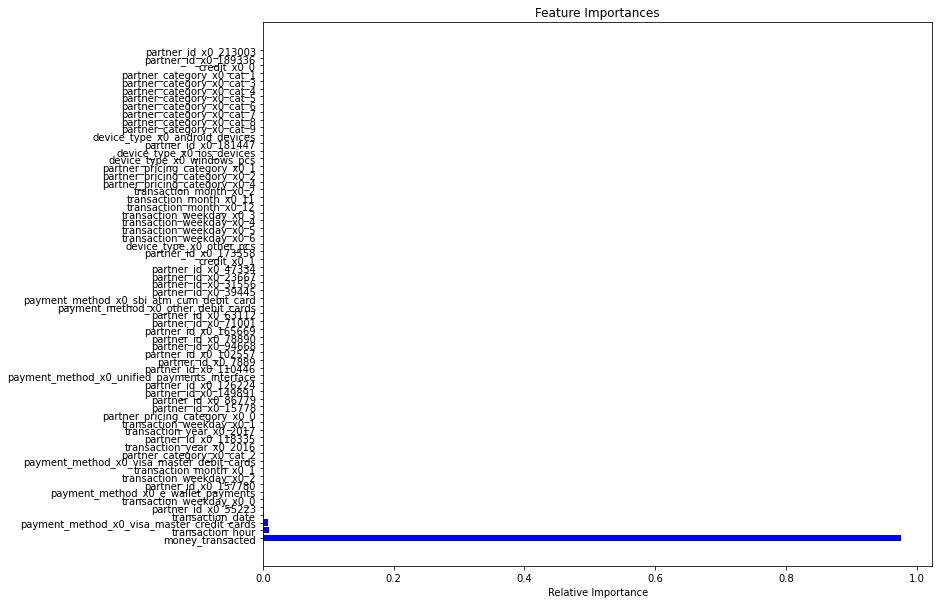

In [ ]:
plt.figure(figsize = (12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('imp_feat.png')

In [ ]:
imp_indices = []
for x in indices:
    if importances[x] > 0:
        imp_indices.append(x)
        
print(imp_indices)
print(len(imp_indices))

[0, 2, 7, 1, 15, 55, 3, 26, 57, 51, 8, 33, 49, 23, 50, 56, 45]
17


In [ ]:
imp_cols = list(X_train_final.columns[imp_indices])
print(imp_cols)

['money_transacted', 'transaction_hour', 'payment_method_x0_visa_master_credit_cards', 'transaction_date', 'partner_id_x0_55223', 'transaction_weekday_x0_0', 'payment_method_x0_e_wallet_payments', 'partner_id_x0_157780', 'transaction_weekday_x0_2', 'transaction_month_x0_1', 'payment_method_x0_visa_master_debit_cards', 'partner_category_x0_cat_2', 'transaction_year_x0_2016', 'partner_id_x0_118335', 'transaction_year_x0_2017', 'transaction_weekday_x0_1', 'partner_pricing_category_x0_0']


`From the above insights, I see 'money_transacted' as the most important variable. So, for the column as I also see there are transactions that has more amount debits which leads to the concern that most of the high money transactions can be fraud. So, I recommend the company to have a maximum limit as such for the transactions and as there are only some accounts as fraud those can be blocked and the transactions are going to happen with the same values of the attributes can be avoided. `

### **Bivariate Analysis**

In [ ]:
def getProbOfisfraud(col, target, df, forGraph=True):
    crosstab = pd.crosstab(index = df[col], columns = df[target])
    crosstab.columns = pd.Index(list(crosstab.columns))
    crosstab = crosstab.reset_index() 
    crosstab['TotalCount'] = crosstab[1] + crosstab[0]
    crosstab['probisfraud'] = crosstab[1] / crosstab['TotalCount']
    
    print(crosstab.head(31))
    if forGraph:
        return crosstab[[col, 'probisfraud']]
    else:
        return crosstab[[col, 'TotalCount', 'probofisfraud']]

In [ ]:
data.columns

Index(['payment_method', 'partner_id', 'partner_category', 'device_type',
       'money_transacted', 'partner_pricing_category', 'is_fraud',
       'transaction_year', 'transaction_date', 'transaction_month',
       'transaction_hour', 'transaction_weekday', 'credit'],
      dtype='object')

               payment_method      0   1  TotalCount  probisfraud
0           e_wallet_payments  27382   2       27384     0.000073
1           other_debit_cards   4452  43        4495     0.009566
2      sbi_atm_cum_debit_card  30533   5       30538     0.000164
3  unified_payments_interface     15   0          15     0.000000
4    visa_master_credit_cards   2401  53        2454     0.021597
5     visa_master_debit_cards  11592  51       11643     0.004380


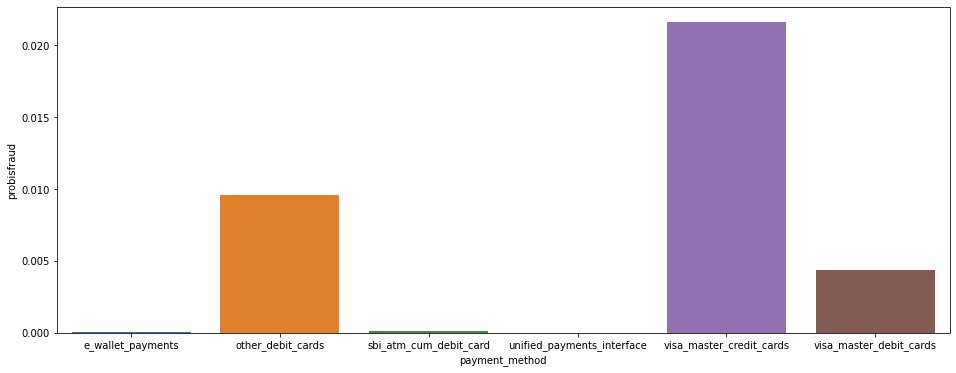

In [ ]:
plt.figure(figsize = (16,6))
sns.barplot(x = 'payment_method',y = 'probisfraud', data=getProbOfisfraud('payment_method', 'is_fraud',data));

       device_type      0    1  TotalCount  probisfraud
0  android_devices  29657    5       29662     0.000169
1      ios_devices    876    0         876     0.000000
2        other_pcs  45415  145       45560     0.003183
3      windows_pcs    427    4         431     0.009281


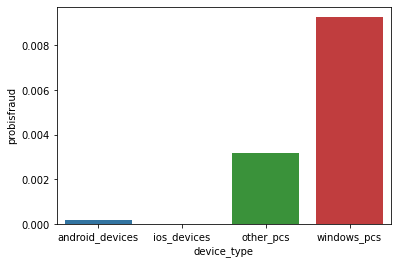

In [ ]:
sns.barplot(x = 'device_type',y = 'probisfraud', data=getProbOfisfraud('device_type', 'is_fraud',data));

  credit      0    1  TotalCount  probisfraud
0      0  45842  149       45991     0.003240
1      1  30533    5       30538     0.000164


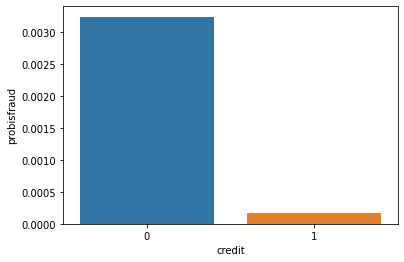

In [ ]:
sns.barplot(x = 'credit',y = 'probisfraud', data=getProbOfisfraud('credit', 'is_fraud',data));

In [ ]:
data.columns

Index(['payment_method', 'partner_id', 'partner_category', 'device_type',
       'money_transacted', 'partner_pricing_category', 'is_fraud',
       'transaction_year', 'transaction_date', 'transaction_month',
       'transaction_hour', 'transaction_weekday', 'credit'],
      dtype='object')

  transaction_year      0   1  TotalCount  probisfraud
0             2016  38502  61       38563     0.001582
1             2017  37873  93       37966     0.002450


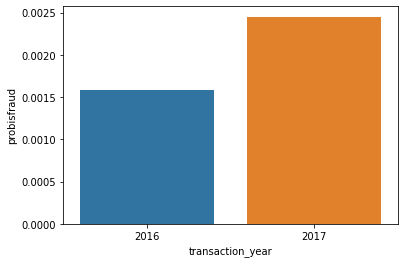

In [ ]:
sns.barplot(x = 'transaction_year',y = 'probisfraud', data=getProbOfisfraud('transaction_year', 'is_fraud',data));

    transaction_date     0   1  TotalCount  probisfraud
0                  1  3546  18        3564     0.005051
1                  2  1479   5        1484     0.003369
2                  3  1829   1        1830     0.000546
3                  4  3684  13        3697     0.003516
4                  5  1751   0        1751     0.000000
5                  6  1686   4        1690     0.002367
6                  7  2815   0        2815     0.000000
7                  8  4796   1        4797     0.000208
8                  9  1566   2        1568     0.001276
9                 10  1765  13        1778     0.007312
10                11  3345   8        3353     0.002386
11                12  2267  13        2280     0.005702
12                13  1773   0        1773     0.000000
13                14  2415   2        2417     0.000827
14                15  2053   4        2057     0.001945
15                16  2889   2        2891     0.000692
16                17  1762   5        1767     0

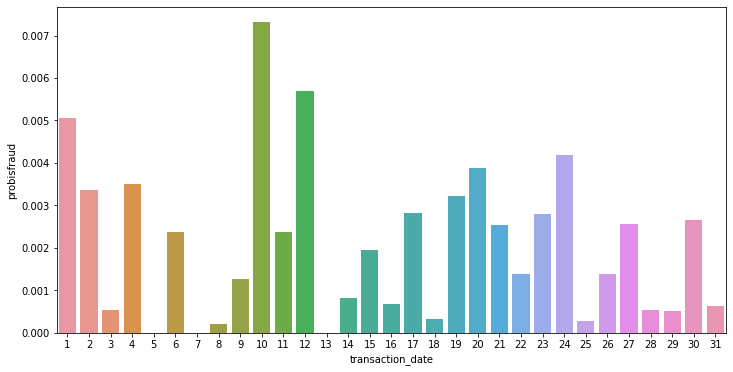

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'transaction_date',y = 'probisfraud', data=getProbOfisfraud('transaction_date', 'is_fraud',data));

  transaction_month      0   1  TotalCount  probisfraud
0                 1  25295  50       25345     0.001973
1                 2  12578  43       12621     0.003407
2                11  10004  11       10015     0.001098
3                12  28498  50       28548     0.001751


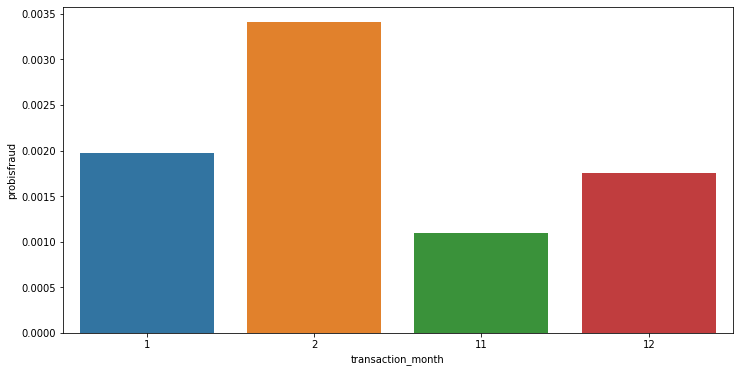

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'transaction_month',y = 'probisfraud', data=getProbOfisfraud('transaction_month', 'is_fraud',data));

    transaction_hour     0   1  TotalCount  probisfraud
0                  0   132   1         133     0.007519
1                  1   141   0         141     0.000000
2                  2   231   0         231     0.000000
3                  3   569   6         575     0.010435
4                  4  1841   0        1841     0.000000
5                  5  3364   5        3369     0.001484
6                  6  4284   6        4290     0.001399
7                  7  4534   9        4543     0.001981
8                  8  4505   4        4509     0.000887
9                  9  4339   6        4345     0.001381
10                10  4793   2        4795     0.000417
11                11  4964   6        4970     0.001207
12                12  4117  23        4140     0.005556
13                13  4142  16        4158     0.003848
14                14  4133   7        4140     0.001691
15                15  5056   7        5063     0.001383
16                16  5801  13        5814     0

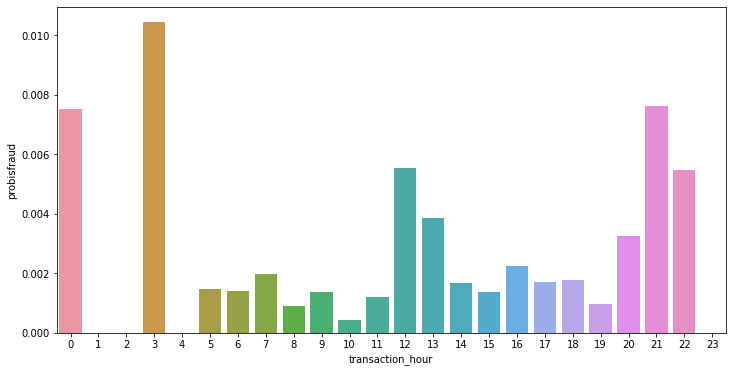

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'transaction_hour',y = 'probisfraud', data=getProbOfisfraud('transaction_hour', 'is_fraud',data));

In [ ]:
data.columns

Index(['payment_method', 'partner_id', 'partner_category', 'device_type',
       'money_transacted', 'partner_pricing_category', 'is_fraud',
       'transaction_year', 'transaction_date', 'transaction_month',
       'transaction_hour', 'transaction_weekday', 'credit'],
      dtype='object')

  transaction_weekday      0   1  TotalCount  probisfraud
0                   0   8186  19        8205     0.002316
1                   1   8795  28        8823     0.003174
2                   2  22149  22       22171     0.000992
3                   3   8102  23        8125     0.002831
4                   4   7752  13        7765     0.001674
5                   5   9396  24        9420     0.002548
6                   6  11995  25       12020     0.002080


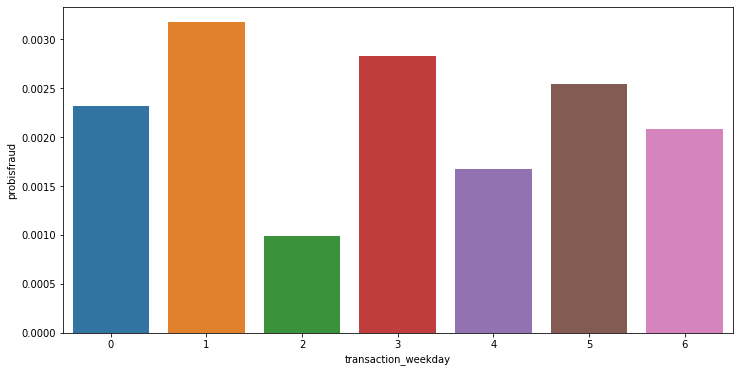

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'transaction_weekday',y = 'probisfraud', data=getProbOfisfraud('transaction_weekday', 'is_fraud',data));

  partner_category      0    1  TotalCount  probisfraud
0            cat_1  36178  128       36306     0.003526
1            cat_2  36004   15       36019     0.000416
2            cat_3   1527    9        1536     0.005859
3            cat_4   1310    0        1310     0.000000
4            cat_5   1026    0        1026     0.000000
5            cat_6    146    0         146     0.000000
6            cat_7    165    0         165     0.000000
7            cat_8     17    2          19     0.105263
8            cat_9      2    0           2     0.000000


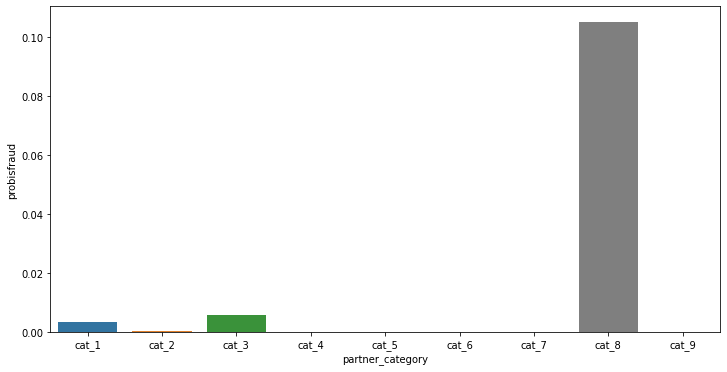

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'partner_category',y = 'probisfraud', data=getProbOfisfraud('partner_category', 'is_fraud',data));

  partner_pricing_category      0    1  TotalCount  probisfraud
0                        0    271   29         300     0.096667
1                        1   1491    6        1497     0.004008
2                        2  63789  110       63899     0.001721
3                        4  10824    9       10833     0.000831


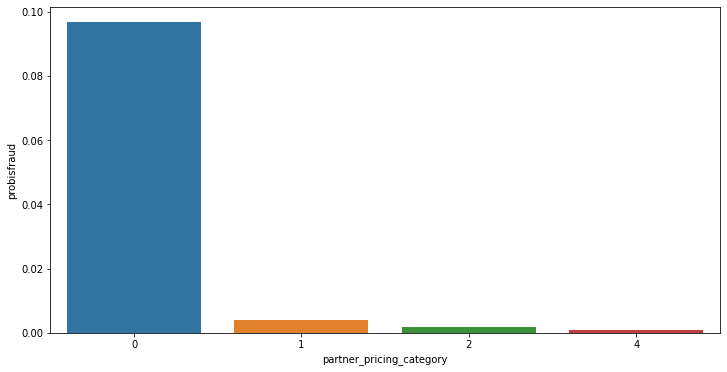

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'partner_pricing_category',y = 'probisfraud', data=getProbOfisfraud('partner_pricing_category', 'is_fraud',data));

In [ ]:
indices

array([ 0,  2,  7,  1, 15, 55,  3, 26, 57, 51,  8, 33, 49, 23, 50, 56, 45,
       10, 19, 25, 24,  6, 22,  9, 21, 20, 18, 27, 17, 16,  4,  5, 13, 12,
       11, 14, 63, 28, 43, 61, 60, 59, 58, 54, 53, 52, 48, 47, 46, 44, 42,
       29, 41, 40, 39, 38, 37, 36, 35, 34, 32, 62, 30, 31])

In [ ]:
X_train_final['money_transacted'] = X_train_final['money_transacted'].astype('int64')

In [ ]:
select

array([ 0,  2,  7,  1, 15, 55,  3, 26, 57, 51])

In [ ]:
X_train_final.iloc[:,[0,  2,  7,  1, 15, 55,  3, 26, 57, 51]]

,money_transacted,transaction_hour,payment_method_x0_visa_master_credit_cards,transaction_date,partner_id_x0_55223,transaction_weekday_x0_0,payment_method_x0_e_wallet_payments,partner_id_x0_157780,transaction_weekday_x0_2,transaction_month_x0_1
14525,0,0.111392,0.0,-0.996284,0.0,0.0,0.0,0.0,1.0,0.0
9243,0,-0.713522,0.0,-0.661697,0.0,0.0,1.0,0.0,0.0,0.0
69178,0,-0.094836,0.0,1.568885,0.0,0.0,0.0,0.0,1.0,0.0
68162,0,1.142535,0.0,0.007478,0.0,0.0,1.0,0.0,1.0,0.0
27512,0,0.936307,0.0,-1.330871,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
63941,0,1.348764,0.0,1.568885,0.0,1.0,0.0,0.0,0.0,1.0
20197,0,0.730078,0.0,0.453594,0.0,0.0,0.0,0.0,0.0,0.0
31695,0,-0.713522,0.0,-0.327109,0.0,0.0,0.0,0.0,0.0,0.0
5802,0,1.348764,0.0,-0.884755,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
select = indices[0:10]
select

array([ 0,  2,  7,  1, 15, 55,  3, 26, 57, 51])

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train_final.iloc[:,[ 0,  2,  7,  1, 15, 55,  3, 26, 57, 51]], y_train)

In [ ]:
train_pred = clf.predict(X_train_final.iloc[:,[ 0,  2,  7,  1, 15, 55,  3, 26, 57, 51]])
val_pred = clf.predict(X_val_final.iloc[:,[ 0,  2,  7,  1, 15, 55,  3, 26, 57, 51]])